# Predict Stock Returns in Scikit Learn - Multifactor Linear Regression 

In the previous notebook we prepared the stock data. Now we will use it to build a multifactor linear model to predict stock returns. 

A **multifactor linear model** has the form:

$$Y~=~\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+error$$

where $X_i$ is the i'th feature (predictor) and $\beta_i$ is the coefficient of the i'th feature.

We fit a model to predict $Y$ by estimating values for all the coefficients. 

The coefficients are estimated by minimizing the **least squares**:

$$\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

We will use Scikit Learn to build our multifactor linear model to predict stock returns. Building a model in Scikit Learn consists of the following steps: 
* Preprocessing of the data
* Training/fitting the model
* Predicting results
* Testing the output

We will go through each of the steps above. Let's start by importing the libraries we will need and read in the data.csv file we created in the previous notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
df = pd.read_csv('data.csv').drop('Unnamed: 0', axis=1)

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 22 columns):
Date                       362 non-null object
company                    362 non-null object
current_price              362 non-null float64
momentum                   362 non-null float64
moving_average             362 non-null float64
moving_volatility          362 non-null float64
trading_range              362 non-null float64
target_return              362 non-null float64
exp_market_change          362 non-null float64
rates                      362 non-null float64
Revenue                    362 non-null float64
Cost_of_Sales              362 non-null float64
Gross_profit               362 non-null float64
Operating_profit           362 non-null float64
Net_Profit                 362 non-null float64
Issue_of_shares            362 non-null float64
Share_repurchase           362 non-null float64
Non_current_assets         362 non-null float64
Current_assets             362 no

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
1,2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2,2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
3,2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
4,2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


Let us take a look at the Anglogold Ashanti Ltd data and how some of the features relate to one another.

In [ ]:
df_anglo  = df[ df['company'].str.contains("Anglogold Ashanti Ltd") ]
df_anglo.describe()

,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,22895.090909,0.023074,22671.212121,1513.233885,655.562879,0.022822,0.028107,5.821818,1239.131818,853.350000,385.781818,67.940909,-14.331818,25.954545,0.327273,4679.531818,1244.404545,3094.968182,737.645455,1227.854545
std,9740.582611,0.261238,9296.551968,667.385373,153.339698,0.235222,0.057288,0.568470,242.792850,177.947295,161.529787,711.657090,517.175758,119.196611,1.035182,3429.898491,952.797315,2355.319719,570.694592,237.082065
min,8059.000000,-0.497312,10046.700000,721.547853,423.550000,-0.448740,-0.073183,4.930000,845.300000,606.000000,157.000000,-3019.000000,-2165.000000,0.000000,0.000000,719.600000,172.300000,220.700000,86.600000,816.600000
25%,13978.500000,-0.092624,14045.416667,1083.834372,527.970833,-0.075428,-0.017566,5.492500,1059.500000,673.925000,268.500000,112.500000,-47.750000,0.000000,0.000000,778.625000,235.700000,442.450000,230.125000,1057.450000
50%,22623.000000,0.000902,23847.825000,1190.686861,641.641667,0.003986,0.037019,5.690000,1227.850000,850.000000,349.000000,162.000000,40.700000,0.000000,0.000000,6175.500000,1426.000000,4071.500000,711.000000,1200.350000
75%,31137.500000,0.137224,31411.066667,1819.833015,778.012500,0.152235,0.069563,6.122500,1358.750000,1034.500000,425.975000,292.175000,167.450000,0.450000,0.000000,7480.500000,1959.250000,5292.250000,1038.750000,1379.000000
max,38025.000000,0.790000,35793.566667,2994.741422,1010.150000,0.493613,0.136024,7.080000,1794.000000,1064.000000,805.000000,584.000000,563.000000,559.600000,3.900000,9887.000000,2961.000000,5450.000000,2254.000000,1758.000000


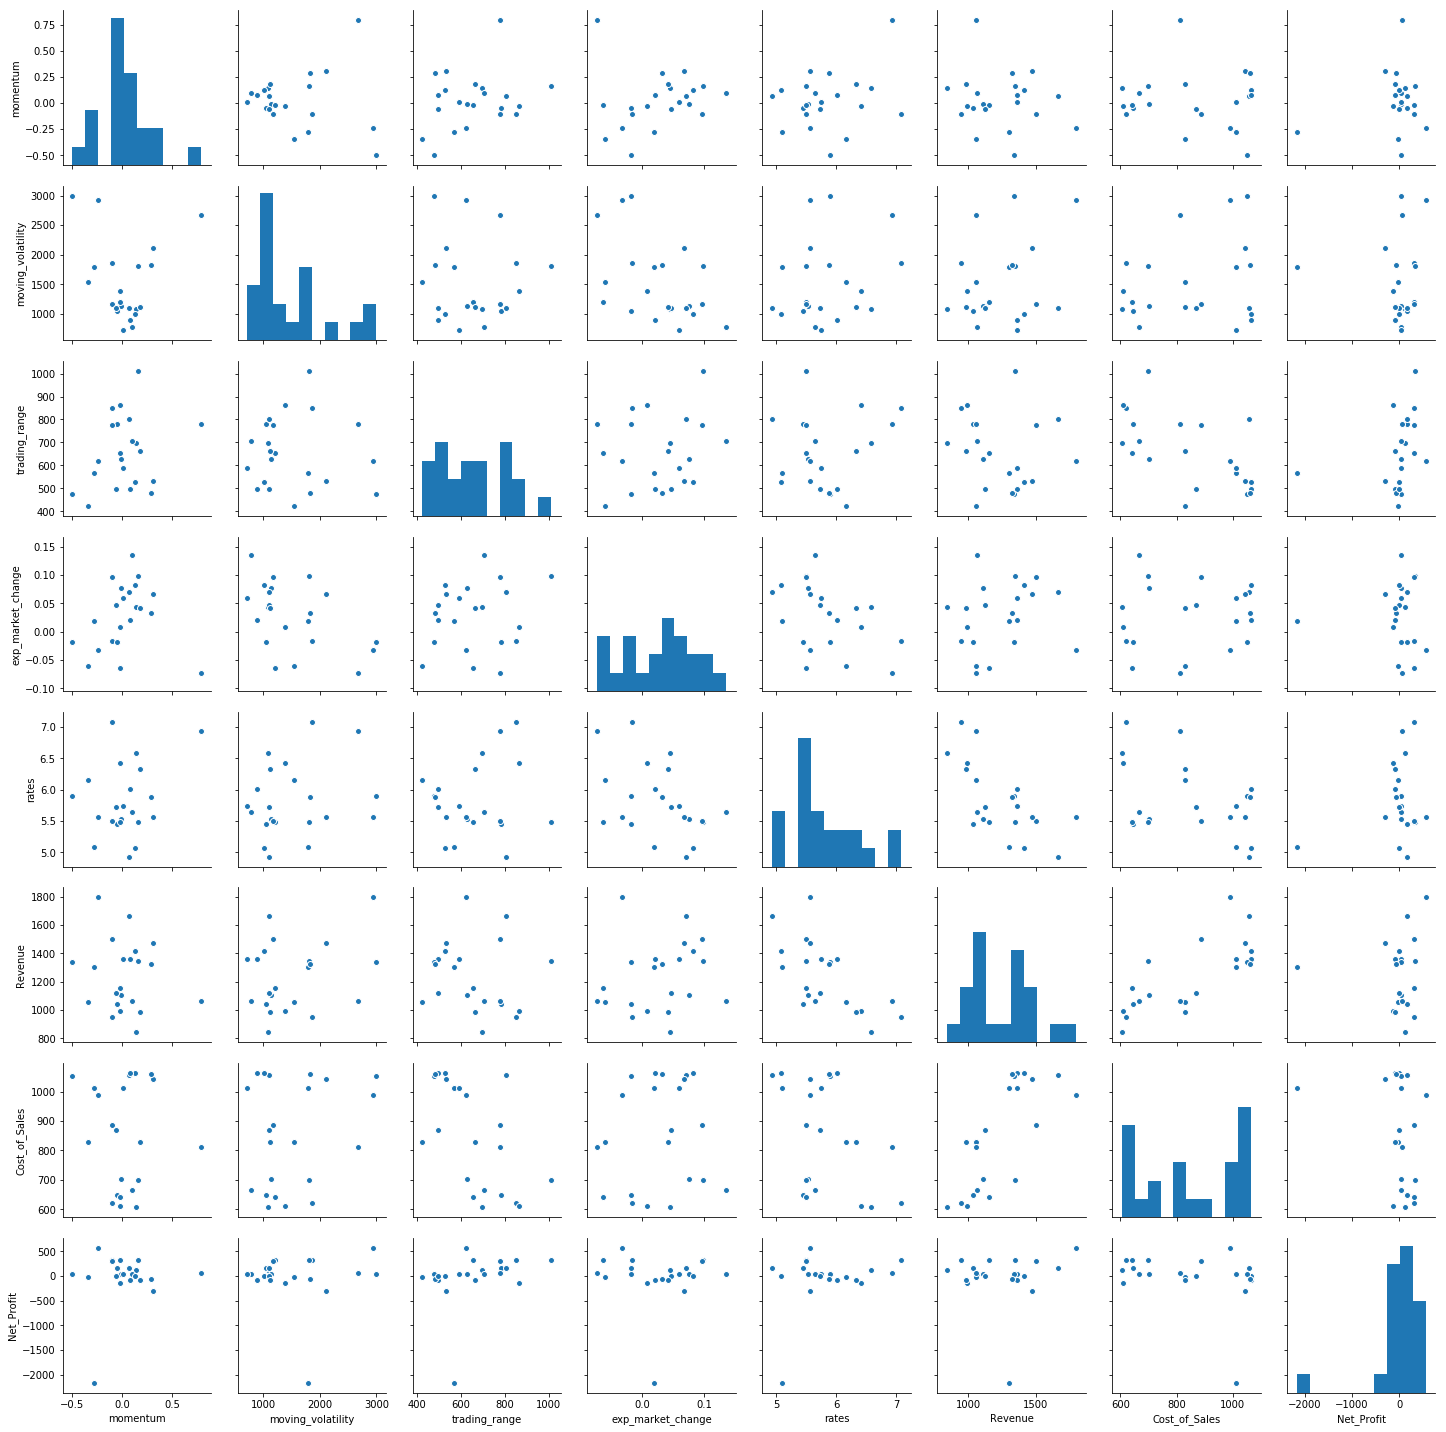

In [ ]:
sns.pairplot(df_anglo[['momentum' ,
                       'moving_volatility',
                       'trading_range',
                       'exp_market_change', 
                       'rates' , 
                       'Revenue', 
                       'Cost_of_Sales',
                       'Net_Profit' ]])

From the pairplot above we can see a linear relationship between revenue and cost of sales, which were expected. But there also seems to be a linear relationship between the momentum (past quarter return) and the market expectation (future return). Are there any other realtionships that you can observe, or find by selecting other features?

Now that we have looked at how some of the features relate to one another for a subset of the data, lets go ahead with the model building. 

## Preprocessing

Preprocessing in sklearn involves:
* Splitting the data into features and labels
* Transforming the data 
* Splitting the data into training and testing data.

Transforming the features (e.g. Normalizing/standardizing) is not always required for multifactor linear regression (although we will do so later, when we consider regularization techiniques to improve our model). So we will only split the data into features and labels and then into training and testing data. 

#### Features/Labels split

Features relate to the independent variables or predictors while labels relate to the dependent variable or target.

In [ ]:
# Lables
y = df['target_return']

# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)

We can use the shape method to see the number of rows and columns (features) in our features data.

In [ ]:
X.shape

(362, 19)

#### Train/Test split

Next we are going to split our data into training and testing data. We do this to fit our model using the training data while we test the output of our model on the testing (unseen) data. Ideally we want a model that has a good fit to both the training and the testing data, however this is rarely the case. The fit to the training data gives us an idea of the bias in the model while the fit to the testing data gives us an idea of the variance in the model.

**Bias** relates to the degree to which our model is an accurate representation of reality: for example, if the relationships between variables are very non-linear and we're using a linear model (such as multiple linear regression), then our model will have high bias. **Variance**, on the other hand, relates to how well our model generalizes to unseen data: a model with high variance will be very sensitive to changes in the training data set. A large part of the modelling challenge lies in understanding and optimising the so-called **bias-variance tradeoff**.

Now let's import the train_test_split method from sklearn.model_selection:

In [ ]:
from sklearn.model_selection import train_test_split

Use the imported method to split the data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

## Training

Now with the data split we can use the training data to train the model - i.e. learn the optimal parameters used to predict future results.

We import LinearRegression from sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LinearRegression

Create an instance of the LinearRegression object so that we can use methods on it.

In [ ]:
lm = LinearRegression()

Use the fit() method to train the model. Note that we only input the training data.

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the model is trained, we can extract the parameters. The parameters consist of the intercept and the coefficients related to the features. These parameters can be used to predict future share returns given the features.

Intercept

In [ ]:
lm.intercept_

0.23577102387826848

The **intercept** above can be interpreted as the expected stock return if all of the feature values are zero.

Coefficients

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
current_price,6.365389e-07
momentum,-2.155042e-02
moving_average,-5.965514e-07
moving_volatility,1.007698e-05
trading_range,-1.968718e-05
exp_market_change,-3.367112e-01
rates,-3.398462e-02
Revenue,-1.736386e-05
Cost_of_Sales,1.726277e-05
Gross_profit,1.727082e-05


A **coefficient** can be interpreted as the expected change in the stock return if the feature value increases by 1. For example the stock return is expected to increase by 0.095 if the momentum increased by 1 (i.e. -0.1 => 0.9).

The **sign of the coefficients** also gives us an indication of which way an increase or decrease in feature value affects our expected stock return. For example because the sign of revenue is positive it implies that we expect higher returns given higher revenue in the past quarter. Is this what we would expect?

Now that we have estimated all the parameters, lets look how good the fit is to the training data. We will look at the mean squared error (MSE) and R squared for the training data to assess the goodness of fit.

The **Mean Squared Error** is defined as:

$$MSE~=~\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The **R Squared** is defined as:

$$R^2~=~1-\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y}_i)^2}$$

We start by importing the metrics module from sklearn.

In [ ]:
from sklearn import metrics

MSE

In [ ]:
# Get predictions for training data
fit_lm = lm.predict(X_train)

# Print MSE for models
print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, fit_lm))

MSE (train)
Linear: 0.0114570613511


R$^2$

In [ ]:
print('R SQUARED SCORE')
print('Linear:', lm.score(X_train, y_train))

R SQUARED SCORE
Linear: 0.0837699589315


## Using statsmodels rather than sklearn

In [ ]:
from pandas.core import datetools
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
traindata = X_train.join(y_train)
lm_sm = smf.ols( 'target_return~ current_price + momentum + moving_average\
             + moving_volatility + trading_range + exp_market_change\
             + rates + Revenue + Cost_of_Sales + Gross_profit\
             + Operating_profit + Net_Profit + Issue_of_shares\
             + Share_repurchase + Non_current_assets + Current_assets\
             + Non_current_liabilities + Current_liabilities + net_cash_op_act',
             data = traindata).fit()
print(lm_sm.summary()) 

                            OLS Regression Results                            
Dep. Variable:          target_return   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.121
Date:                Tue, 05 Dec 2017   Prob (F-statistic):              0.330
Time:                        09:51:05   Log-Likelihood:                 206.36
No. Observations:                 253   AIC:                            -372.7
Df Residuals:                     233   BIC:                            -302.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Predicting

The trained model can now be used to predict future stock returns. We use the predict() method on our model instance. Note that now we input the testing data => only the features since our model is already trained and now needs to predict the returns (labels).

In [ ]:
predictions = lm.predict(X_test)

## Testing

Finally we test the accuracy of our predictions. To do this we compare our predictions with the labels of the testing dataset. Let's look at a graph of our predicted results vs. actual results.

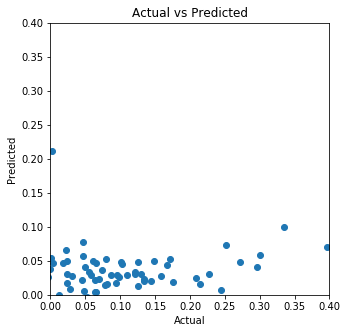

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.4)
ax.scatter(y_test,predictions)

Next we look at some statistical measures to test our output. In this case we use MSE. A low MSE means that our model generalizes well to unseen data.

In [ ]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 0.0244668917227


## Comparing two models

To illustrate how we can compare two linear models, let us build a second model which is almost identical to the model run above, but excludes 'net_cash_op_act' from the predictors. We will then look at three metrics for comparing models, namely adjusted $R^2$, AIC and BIC. 

In [ ]:
# Lables
y2 = df['target_return']

# Features
X2 = df.drop(['Date', 'company', 'target_return','net_cash_op_act'], axis=1)

# Train/Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=50)

# Fitting linear regression to training data
lm2 = LinearRegression()
lm2.fit(X_train2,y_train2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
print('Intercept:              ', lm2.intercept_)
print('\n')
coeff_df = pd.DataFrame(lm2.coef_,X2.columns,columns=['Coefficient'])
print( coeff_df)

Intercept:               0.241654317677


                          Coefficient
current_price            4.465901e-07
momentum                -1.985497e-02
moving_average          -3.233334e-07
moving_volatility        1.070858e-05
trading_range           -2.330393e-05
exp_market_change       -3.550128e-01
rates                   -3.527479e-02
Revenue                 -2.017030e-05
Cost_of_Sales            2.023262e-05
Gross_profit             2.019402e-05
Operating_profit        -8.856042e-08
Net_Profit              -1.758764e-06
Issue_of_shares          8.152830e-08
Share_repurchase         9.587784e-07
Non_current_assets       1.028664e-09
Current_assets           1.029827e-08
Non_current_liabilities  2.478594e-08
Current_liabilities     -4.328677e-09


In [ ]:
traindata2 = X_train2.join(y_train2)
lm2_sm = smf.ols( 'target_return~ current_price + momentum + moving_average\
             + moving_volatility + trading_range + exp_market_change\
             + rates + Revenue + Cost_of_Sales + Gross_profit\
             + Operating_profit + Net_Profit + Issue_of_shares\
             + Share_repurchase + Non_current_assets + Current_assets\
             + Non_current_liabilities + Current_liabilities',
             data = traindata2).fit()
print(lm2_sm.summary()) 

                            OLS Regression Results                            
Dep. Variable:          target_return   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.153
Date:                Tue, 05 Dec 2017   Prob (F-statistic):              0.302
Time:                        09:51:24   Log-Likelihood:                 206.04
No. Observations:                 253   AIC:                            -374.1
Df Residuals:                     234   BIC:                            -306.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Let us compare the $R^2$ from the two models

In [ ]:
print('R squared SCORE')
print('Model 1:', lm.score(X_train, y_train)) 
print('Model 2:', lm2.score(X_train2, y_train2))


R squared SCORE
Model 1: 0.0837699589315
Model 2: 0.0814820736495


If we only used the $R^2$ statistic to compare the two models, we would assume that model 1 provides a better fit. However, model 1 also has 19 parameters compared to model 2 which only has 18. One of the disadvantages with $R^2$ is that it does not adjust for using different parameters, and as you add more and more parameters to your model, you will generally increase the $R^2$ value. To overcome this problem, we can rather look at $$ Adjusted R^2 = 1 - (1-R^2) \times \frac{n-1}{n - p -1} $$ 

In [ ]:
print('Adjusted R squared SCORE')
print('Model 1:', lm_sm.rsquared_adj) 
print('Model 2:', lm2_sm.rsquared_adj)


Adjusted R squared SCORE
Model 1: 0.00905592124781
Model 2: 0.0108268485457


We can see that with the adjusted $R^2$ values, model 2 is a better fit. Two alternative methods for comparing model selection is to look at information criteria e.g Akaike's information criterion (AIC) or Bayesian information criterion(BIC). The aim is to choose a model with the lowest AIC or BIC. For further information you can read up  http://scott.fortmann-roe.com/docs/MeasuringError.html.

In [ ]:
print('AIC')
print('Model 1:', lm_sm.aic) 
print('Model 2:', lm2_sm.aic)
print('BIC')
print('Model 1:', lm_sm.bic) 
print('Model 2:', lm2_sm.bic)


AIC
Model 1: -372.711806076
Model 2: -374.080836279
BIC
Model 1: -302.044016301
Model 2: -306.946435993


Based on both AIC and BIC model 2 appears to give a better fit. However, let us compare the two models on the test data set and compare the MSE to see which model gives the best fit on the test data.

In [ ]:
predictions2 = lm2.predict(X_test2)
print('Test MSE')
print('Model 1:', metrics.mean_squared_error(y_test, predictions))
print('Model 2:', metrics.mean_squared_error(y_test2, predictions2))


Test MSE
Model 1: 0.0244668917227
Model 2: 0.0246023224392


In this scenario we can see that the Test MSE are almost identical. Thus to avoid overfitting, it would be better to choose the model with 18 parameters.

In the next notebook we will look at techniques to improve a multifactor linear regression model.